# <center>Tarea 5<center>
# <center>Para entregar el 30 de noviembre<center>

## 1. Este ejercicio es sobre word embeddings con el modelo neuronal de lenguaje que vimos según la propuesta de Mikolov et al. Puedes entregar la respuesta en un PDF anexo si gustas.

Considera el modelo skip-gram de `word2vec`, donde la predicción de la palabra $w_j$ dada cierta palabra pivote (input) $w_i$ se calcula usando softmax:
$$
\hat{y}_j = P(w_j|w_i) = \frac{\exp(\mathbf{u}_{w_j}'\mathbf{v}_{w_i})}{\sum_{v=1}^V \exp(\mathbf{u}_{w_v}' \mathbf{v}_{w_i})}
$$

En esta expresión, $\mathbf{v}_w$ y $\mathbf{u}_w$ son dos representaciones vectoriales de una palabra $w$, dadas por los pesos $\text{input}\rightarrow \text{hidden}$ $\mathbf{W}_{V\times N}$ y $\text{hidden}\rightarrow \text{output}$ $\mathbf{U}_{N\times V}$, respectívamente. $V$ es el tamaño del vocabulario y $N$ representa el tamaño del embedding.

Suponiendo que los parámetros (embeddings) se obtienen minimizando cross-entropy:
$$
L(\mathbf{y},\hat{\mathbf{y}})=-\sum_{v\in V} y_v \log(\hat{y}_v),
$$
donde $\mathbf{y}$ es un vector 'one-hot encoding' y $\hat{\mathbf{y}}$ son las predicciones usando softmax.

### a) Muestra que el gradiente respecto a $\mathbf{v}_{w_i}$ representa el error de predicción (pesado) de la capa de salida, es decir:

$$ 
        \frac{\partial L}{\partial \mathbf{v}_{w_i}} = \mathbf{U}(\hat{\mathbf{y}}-\mathbf{y}),
$$
### donde $\mathbf{U}=(\mathbf{u}_1,\mathbf{u}_2,\ldots,\mathbf{u}_V)$ es la matriz de todos los vectores de salida. 
    
### b) Muestra que el gradiente de los vectores de salida $\mathbf{u}_{w_t}$'s (incluyendo $\mathbf{u}_{w_j}$) representa (nuevamente) el error de predicción con diferente peso:
$$ 
        \frac{\partial L}{\partial \mathbf{U}} = \mathbf{v}_{w_i}(\hat{\mathbf{y}}-\mathbf{y})',
$$

### c) Repite los dos incisos anteriores pero ahora considerando que usas la función de costo con muestreo negativo, es decir: 
$$
    L(\mathbf{v}_{w_i}, \mathbf{u}_{w_j})=-\log(\sigma(\mathbf{u}_{w_j}'\mathbf{v}_{w_i}))- \sum_{k=1}^K \log(\sigma(-\mathbf{u}_{w_k}'\mathbf{v}_{w_i})),
$$
### con $\sigma(\cdot)$ la función sigmoide. (Observa que la expresión anterior es la función de costo para SGNS de Mikolov que vimos en clase, pero con signo negativo, ya que queremos minimizarla)

### d) Explica porqué ésta función de costo es mucho más eficiente que usar la función softmax con Cross-Entropy.

## 2. Considera el corpus `hispablogs.zip` (Rangel et al., 2017. https://arxiv.org/abs/1705.10754), que contiene una recopilación de blogs para los países de habla hispana Argentina, Chile, España, México y Perú. Puedes usar el siguiente código para leer los archivos train y test:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import re

def get_texts_from_dir(cat_dir):
    texts = []
    data_dir = cat_dir
    category_index = {}
    categories = []
    for category_name in sorted(os.listdir(data_dir)):
        category_id = len(category_index)
        category_index[category_name] = category_id
        category_path = os.path.join(data_dir, category_name)
        for f_name in sorted(os.listdir(category_path)):
            f_path = os.path.join(category_path, f_name)
            f = open(f_path, "r", encoding="utf8")
            texts += [f.read()]                
            f.close()
            categories += [category_id]
    print("%d files loaded from %s" % (len(texts), cat_dir))
    return texts, categories, category_index

# Load the RAW text and Category labels
tr_txt, tr_y, tr_y_ind = get_texts_from_dir("/content/drive/My Drive/Tarea 5/hispablogs/train")
te_txt, te_y, te_y_ind = get_texts_from_dir("/content/drive/My Drive/Tarea 5/hispablogs/test")

2250 files loaded from /content/drive/My Drive/Tarea 5/hispablogs/train
1000 files loaded from /content/drive/My Drive/Tarea 5/hispablogs/test


In [ ]:
tr_y_ind

{'ar': 0, 'cl': 1, 'es': 2, 'mx': 3, 'pe': 4}

In [ ]:
tr_txt[5]

'la vedette que protagonizó un accidente en la ruta la altura de pehuajó se encuentra en estado reservado debido la gravedad de las heridas el último parte médico rezan por su recuperación el último parte médico luego del accidente sufrido por la modelo mariana de melo indica que la paciente presentó politraumatismo grave con lesiones intraabdominales sangrantes que requirieron intervención_quirúrgica de urgencia sufrió traumatismo de cráneo con pérdida de conciencia requiriendo asistencia respiratoria mecánica monitoreo actualmente se encuentra en coma farmacológico bajo monitoreo de lesión intracraneana por la presencia de múltiples contusiones cerebrales presenta además fracturas vertebrales contusión pulmonar fractura de miembro superior izquierdo en el contexto de post operatorio abdominal el pronóstico es reservado informaron desde la dirección del sanatorio los arcos donde la vedette se encuentra internada fuente infobae télam\nmoria casán firmó hace instantes su contrato que la

In [ ]:
tr_y[5]

0

## puedes usar éste código para crear una bolsa de palabras

In [3]:
from keras.preprocessing.text import Tokenizer
# Contruir tokenizador y vocabulario
n_words = 20000
tokenizer = Tokenizer(num_words=n_words) # el Tokenizador solo tomará las 'n_words' palabras más frecuentes
tokenizer.fit_on_texts(tr_txt) 

# word_index contiene un diccionario con el vocabulario y sus indices en orden ascendente de acuerdo a su frecuencia
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
word_counts = tokenizer.word_counts

Found 233933 unique tokens.


In [4]:
query_w = 'tortilla'
print("Frequency of \"%s\" is %s" % (query_w, word_counts[query_w]))

Frequency of "tortilla" is 55


In [5]:
# con esta instruccion se crea la bolsa de palabras, por ejemplo, para los textos de train:
BOW_train=tokenizer.texts_to_matrix(tr_txt, mode="count")
BOW_train.shape

(2250, 20000)

In [6]:
BOW_test=tokenizer.texts_to_matrix(te_txt, mode="count")

### a) Representa con una nube de palabras, las palabras más frecuentes usadas en cada país.

Para representar la nube de palabras de las palabras más comunes en Argentina, Chile, España, México y Perú se utilizan las librerías wordcloud y PIL. La primera permite representar la frecuencia de las palabras de acuerdo a su tamaño relativo al resto. La segunda nos permite cargar las imágenes de los mapas de cada país que formarán el contorno de las nubes de palabras. Debido a la forma tan particular de Chile, para este país la nube de palabras se representará con los colores de su bandera.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wordcloud 
from PIL import Image

In [ ]:
def juntar_txt(pais):
  flag=0
  i=0
  while flag != 1:
    if tr_y[i]==pais:
      temp_text=tr_txt[i]
      flag=1
    else:
      i=i+1
  
  for j in range(2250):
    if tr_y[j]==pais:
      temp_text=temp_text+tr_txt[j]
  return temp_text

In [ ]:
txt_ar=juntar_txt(0)
txt_cl=juntar_txt(1)
txt_es=juntar_txt(2)
txt_mx=juntar_txt(3)
txt_pe=juntar_txt(4)

In [ ]:
WordCloud=wordcloud.WordCloud

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
import cv2
stopwords=stopwords.words('spanish')

In [ ]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [ ]:
ar_mask=np.array(Image.open("/content/drive/My Drive/Tarea 5/arg_map.png"))
cl_mask=np.array(Image.open("/content/drive/My Drive/Tarea 5/cl_map.png"))
es_mask=np.array(Image.open("/content/drive/My Drive/Tarea 5/esp_map.png"))
mx_mask=np.array(Image.open("/content/drive/My Drive/Tarea 5/mx_map.png"))
pe_mask=np.array(Image.open("/content/drive/My Drive/Tarea 5/per_map.png"))
#wine_mask = cv2.cvtColor(wine_mask, cv2.COLOR_BGR2GRAY)

t_ar_mask = np.ndarray((ar_mask.shape[0],ar_mask.shape[1]), np.int32)
t_cl_mask = np.ndarray((cl_mask.shape[0],cl_mask.shape[1]), np.int32)
t_es_mask = np.ndarray((es_mask.shape[0],es_mask.shape[1]), np.int32)
t_mx_mask = np.ndarray((mx_mask.shape[0],mx_mask.shape[1]), np.int32)
t_pe_mask = np.ndarray((pe_mask.shape[0],pe_mask.shape[1]), np.int32)

for i in range(len(ar_mask)):
    t_ar_mask[i] = list(map(transform_format, ar_mask[i]))

for i in range(len(cl_mask)):
    t_cl_mask[i] = list(map(transform_format, cl_mask[i]))

for i in range(len(es_mask)):
    t_es_mask[i] = list(map(transform_format, es_mask[i]))

for i in range(len(mx_mask)):
    t_mx_mask[i] = list(map(transform_format, mx_mask[i]))

for i in range(len(pe_mask)):
    t_pe_mask[i] = list(map(transform_format, pe_mask[i]))


**ARGENTINA**

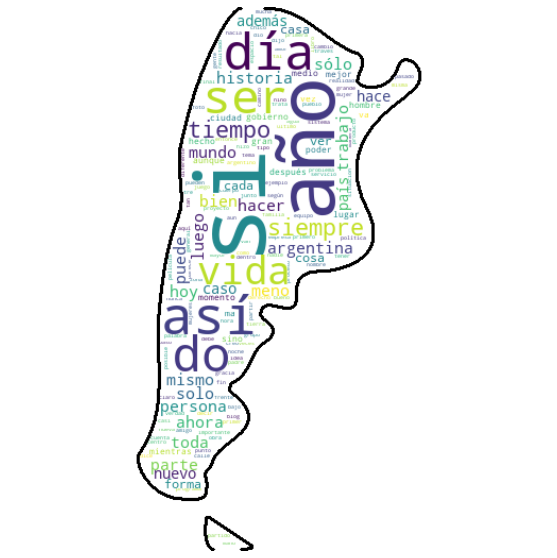

In [ ]:
wc_ar = WordCloud(background_color="white", max_words=1000, mask=t_ar_mask,
               stopwords=stopwords, contour_width=3, contour_color='black').generate(txt_ar)

plt.figure(figsize=[20,10])
plt.imshow(wc_ar, interpolation='bilinear')
plt.axis("off")
plt.show()

**CHILE**

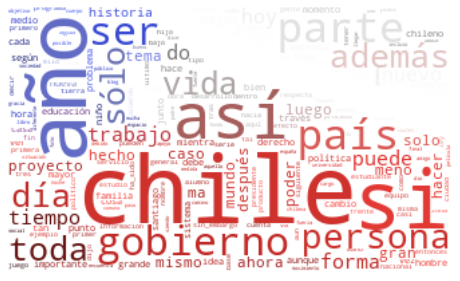

In [ ]:
cl_flag_mask = np.array(Image.open("/content/drive/My Drive/Tarea 5/cl_flag.jpg"))
wc_cl = WordCloud(stopwords=stopwords,background_color="white", mode="RGBA", mask=cl_flag_mask).generate(txt_cl)
image_colors = wordcloud.ImageColorGenerator(cl_flag_mask)
plt.figure(figsize=[8,8])
plt.imshow(wc_cl.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

**ESPAÑA**

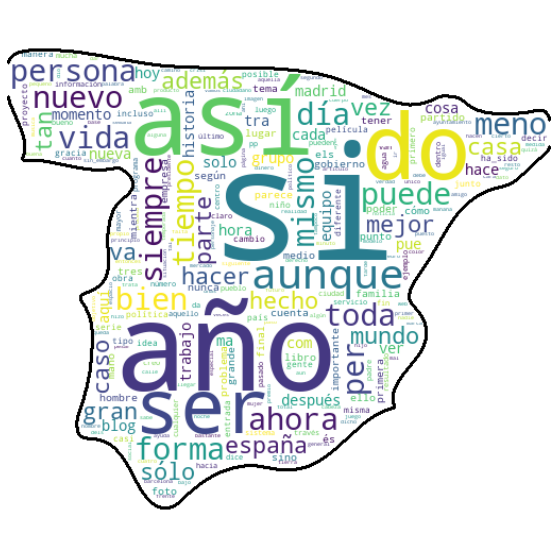

In [ ]:
wc_es = WordCloud(background_color="white", max_words=1000, mask=t_es_mask,
               stopwords=stopwords, contour_width=3, contour_color='black').generate(txt_es)

plt.figure(figsize=[20,10])
plt.imshow(wc_es, interpolation='bilinear')
plt.axis("off")
plt.show()

**MÉXICO**

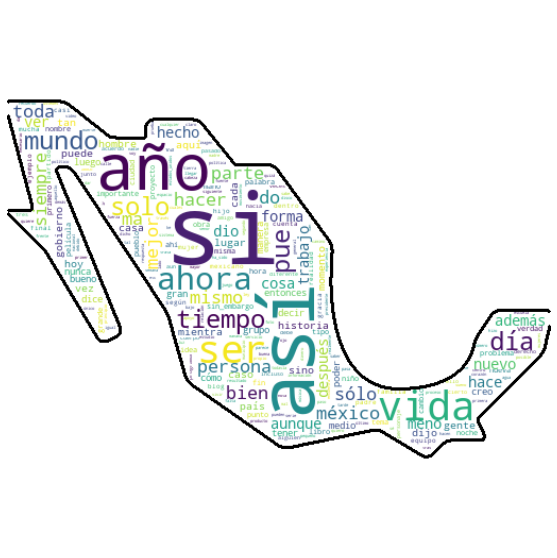

In [ ]:
wc_mx = WordCloud(background_color="white", max_words=1000, mask=t_mx_mask,
               stopwords=stopwords, contour_width=3, contour_color='black').generate(txt_mx)

plt.figure(figsize=[20,10])
plt.imshow(wc_mx, interpolation='bilinear')
plt.axis("off")
plt.show()

**PERÚ**

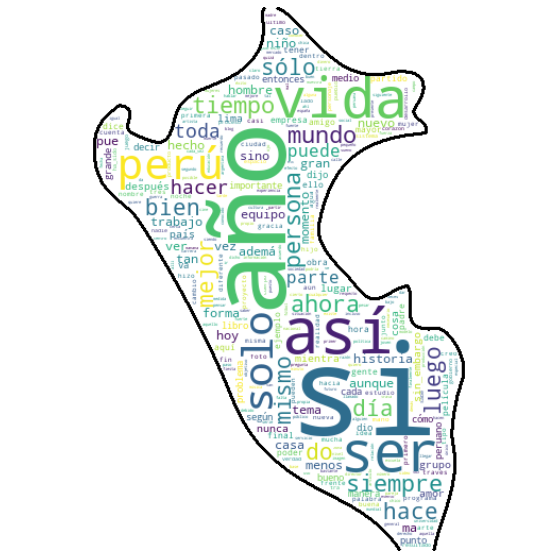

In [ ]:
wc_pe = WordCloud(background_color="white", max_words=1000, mask=t_pe_mask,
               stopwords=stopwords, contour_width=3, contour_color='black').generate(txt_pe)

plt.figure(figsize=[20,10])
plt.imshow(wc_pe, interpolation='bilinear')
plt.axis("off")
plt.show()

### b) Crea un baseline tomando un clasificador SVM lineal basado en la bolsa de palabras. Reporta tus resultados en las métricas que ya conoces (no solo precisión...)

Se ajusta un clasificador SVM lineal con la librería SKLEARN utilizando una función de decisió one-vs-rest y el parámetro gamma automático.

In [16]:
from sklearn.svm import SVC

svm = SVC(gamma='auto',probability=True,decision_function_shape='ovr')
svm.fit(BOW_train,tr_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [17]:
svm_predicted=svm.predict(BOW_test)
svm_prob = svm.predict_proba(BOW_test)

In [18]:
#Accuracy train
svm.score(BOW_train,tr_y)

0.7951111111111111

Para el conjunto de entrenamiento se obtuvo un puntaje de 0.79 de accuracy. A continuación se presentan los resultados del clasificador baseline, en primera instancia se muestra el accuracy general obtenido en el conjunto de prueba y después el reporte de clasificación completo para cada una de las clases en el conjunto de prueba.

In [ ]:
import sklearn.metrics as metrics
accuracy = metrics.accuracy_score(te_y, svm_predicted)
auc = metrics.roc_auc_score(te_y, svm_prob, 
                            multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(te_y, svm_predicted))

Accuracy: 0.28
Auc: 0.62
Detail:
              precision    recall  f1-score   support

           0       0.47      0.09      0.14       200
           1       0.24      0.88      0.37       200
           2       0.73      0.14      0.23       200
           3       0.30      0.21      0.25       200
           4       0.35      0.08      0.13       200

    accuracy                           0.28      1000
   macro avg       0.42      0.28      0.23      1000
weighted avg       0.42      0.28      0.23      1000



Este reporte nos muestra que el puntaje de precisión es de 0.28 y el área bajo la curva roc es de 0.62, por lo que el modelo es, por poco, mejor que un modelo aleatorio. El conjunto de prueba está perfectamente balanceado como vemos en la columna de support. Los textos de España, son los que tienen un mayor número de textos clasificados correctamente con respecto a todos los textos adjudicados a España, mientras que los de Chile son los que tienen un mayor porcentaje de verdaderos positivos en la clasificación. Se presenta además la matriz de confusión y la curva ROC.

In [ ]:
countries=tr_y_ind.keys()

In [ ]:
import pandas as pd
y_test_array = pd.get_dummies(te_y, drop_first=False).values

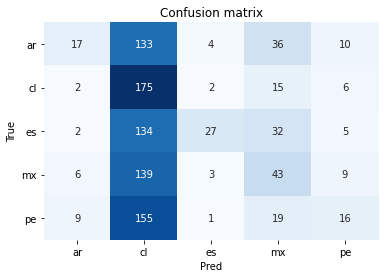

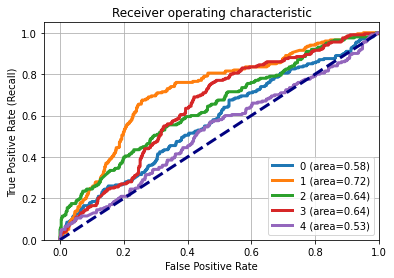

In [ ]:
import seaborn as sns
#Confusion matrix

classes = np.unique(te_y)
cm = metrics.confusion_matrix(te_y, svm_predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=countries, 
       yticklabels=countries, title="Confusion matrix")
plt.yticks(rotation=0)

fig, ax = plt.subplots()
## Plot roc
for i in range(len(np.unique(te_y))):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           svm_prob[:,i])
    ax.plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax.plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax.set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax.legend(loc="lower right")
ax.grid(True)
plt.show()

En la matriz de confusión se ve que la mayoría de los textos mal clasificados se adjudican a la categoría de Chile, y que también es la categoría con un mayor número de textos clasificados correctamente. La curva ROC nos muestra que al menos para todas las clases se obtiene un puntaje mayor a 0.50 que es lo que se esperaba de este clasificador.

### c) Implementa clasificadores basados en
- SVM con TF-IDF
- Redes convolucionales
- Redes LSTM o GRU

### Haz un breve reporte comparando los resultados, elige el mejor método y explica porqué. Especifica TODOS los parámetros que usaste en tus métodos (número de capas y unidades ocultas, longitud de secuencia, padding, regularización, etc). Usa una capa de embeddings con y sin transfer learning usando pesos pre-entrenados para español, verifica si los resultados son diferentes y elige cuál embedding prefieres y porqué. Para transfer learning, puedes usar `word2vec`, `gloVe` o `fastText`. Puedes buscar embeddings en español en los sitios oficiales de los métodos, o en éste sitio: https://github.com/dccuchile/spanish-word-embeddings.

**SVM TF-IDF**

Para obtener la representación TF-IDF utilizamos el vectorizador de la librería de SKLEARN. Se decidió por transformar los textos originales, en lugar de la bolsa de palabras previamente obtenidas debido a que se obtenían mejores resultados. En esta sección por simplicidad, se presenta únicamente la métrica de presición (accuracy)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer 
feature_extraction = TfidfVectorizer()

tfidf_train=feature_extraction.fit_transform(tr_txt)
tfidf_test=feature_extraction.transform(te_txt)

In [19]:
svm = SVC(gamma='auto',decision_function_shape='ovr')
svm.fit(tfidf_train,tr_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
#Accuracy Train
svm.score(tfidf_train,tr_y)

0.40044444444444444

In [21]:
#Accuracy Test
svm.score(tfidf_test,te_y)

0.32

Se obtuvo con este método una ligera mejora con respecto a la puntuación de accuracy en el conjunto de prueba que con el clasificador lineal basado en una Bolsa de Palabras regular, sin embargo el resultado aún es malo. Además el score que se obtuvo para el conjunto de entrenamiento es mucho menor que con el método anterior.

**MODELO NN BASELINE**

Se propone primero una red simple (sin capas de convolución o LSTM) para verificar los resultados que se obtienen a partir de este punto para comparar el resto de los modelos. Este modelo únicamente cuenta con una capa densa oculta con 36 unidades, una capa de salida con función de activación sigmoide y una capa de regularización dropout entre ellas. El optimizador que tuvo mejores resultados en las pruebas fue el **adam** por lo que se utilizará en los demás modelos también. La función de costo es la **categorical crossentropy**. Se encontró que 30 épocas fueron suficientes para obtener resultados satisfactorios en cuanto al conjunto de entrenamiento y un resultado bastante decente en el conjunto de prueba.

In [8]:
from keras import layers
from keras import models
from keras import optimizers
import time
from keras.preprocessing import sequence
from keras.optimizers import RMSprop

In [9]:
from keras.utils import to_categorical
y_train=to_categorical(np.asarray(tr_y))
y_test=to_categorical(np.asarray(te_y))

In [10]:
input_dim = BOW_train.shape[1]  # Number of features

simple_model = models.Sequential()
simple_model.add(layers.Dense(36, input_dim=input_dim, activation='relu'))
simple_model.add(layers.Dropout(0.2))
simple_model.add(layers.Dense(5, activation='sigmoid'))
simple_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
simple_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 36)                720036    
_________________________________________________________________
dropout (Dropout)            (None, 36)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 185       
Total params: 720,221
Trainable params: 720,221
Non-trainable params: 0
_________________________________________________________________


In [11]:
simple_history = simple_model.fit(BOW_train, y_train,
                    epochs=30,
                    batch_size=64,
                    validation_split=0.3)

Epoch 1/30
25/25 [==============================] - 0s 19ms/step - loss: 1.4825 - accuracy: 0.3473 - val_loss: 8.4929 - val_accuracy: 0.0015
Epoch 2/30
25/25 [==============================] - 0s 8ms/step - loss: 1.2814 - accuracy: 0.4730 - val_loss: 7.9860 - val_accuracy: 0.0015
Epoch 3/30
25/25 [==============================] - 0s 7ms/step - loss: 1.0692 - accuracy: 0.6305 - val_loss: 5.7886 - val_accuracy: 0.1393
Epoch 4/30
25/25 [==============================] - 0s 7ms/step - loss: 0.6849 - accuracy: 0.8197 - val_loss: 8.3728 - val_accuracy: 0.0430
Epoch 5/30
25/25 [==============================] - 0s 8ms/step - loss: 0.5464 - accuracy: 0.8806 - val_loss: 5.5846 - val_accuracy: 0.2548
Epoch 6/30
25/25 [==============================] - 0s 8ms/step - loss: 0.3696 - accuracy: 0.9270 - val_loss: 6.7044 - val_accuracy: 0.2548
Epoch 7/30
25/25 [==============================] - 0s 8ms/step - loss: 0.2509 - accuracy: 0.9479 - val_loss: 8.0286 - val_accuracy: 0.2193
Epoch 8/30
25/25 [=

In [12]:
simple_model.evaluate(BOW_test,y_test)

32/32 [==============================] - 0s 3ms/step - loss: 2.5520 - accuracy: 0.5470


[2.5519628524780273, 0.546999990940094]

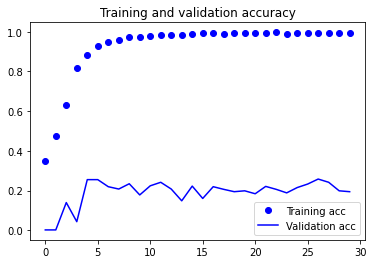

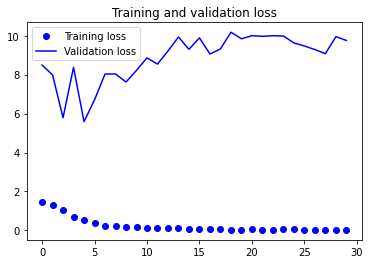

In [22]:
acc = simple_history.history['accuracy']
val_acc = simple_history.history['val_accuracy']
loss = simple_history.history['loss']
val_loss = simple_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Se consiguió un mejor resultado que los dos modelos anteriores de clasificadores SVM con respecto a los puntajes de training y test accuracy. Dados los buenos resultados obtenidos con un modelo tan simple y utilizando la bolsa de palabras, es probable que no sean necesarias capas de convolución o el uso de redes recurrentes. Sin embargo se exploran a continuación enfoques de este tipo.

**Modelo Convolucional**

Para el modelo de red convolucional se propone utilizar una capa de embedding previo a la capa convolucional en 1 dimensión, seguido de una capa GlobalMaxPooling y por último dos capas densas idénticas a las utilizadas en el modelo baseline con su capa de regularización dropout correspondiente. El total de parámetros que utiliza este modelo es de alrededor de 1,370,000, poco menos del doble que la primera red.

In [23]:
max_len=BOW_train.shape[1]
max_features=10000

In [24]:
embedding_dim = 128
vocab_size=10000
maxlen=BOW_train.shape[1]

cnn_model = models.Sequential()
cnn_model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
cnn_model.add(layers.Conv1D(128, 5, activation='relu'))
cnn_model.add(layers.GlobalMaxPooling1D())
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.Dense(32, activation='relu'))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.Dense(5, activation='sigmoid'))
cnn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20000, 128)        1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 19996, 128)        82048     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                

In [25]:
cnn_history = cnn_model.fit(BOW_train, y_train,
                    epochs=30,
                    batch_size=64,
                    validation_split=0.3)

Epoch 1/30
25/25 [==============================] - 21s 829ms/step - loss: 1.4548 - accuracy: 0.2825 - val_loss: 3.5444 - val_accuracy: 0.0000e+00
Epoch 2/30
25/25 [==============================] - 19s 777ms/step - loss: 1.4029 - accuracy: 0.3060 - val_loss: 3.2321 - val_accuracy: 0.0000e+00
Epoch 3/30
25/25 [==============================] - 19s 779ms/step - loss: 1.3567 - accuracy: 0.3524 - val_loss: 3.7321 - val_accuracy: 0.0000e+00
Epoch 4/30
25/25 [==============================] - 20s 781ms/step - loss: 1.3201 - accuracy: 0.3740 - val_loss: 3.7682 - val_accuracy: 0.0000e+00
Epoch 5/30
25/25 [==============================] - 20s 784ms/step - loss: 1.2910 - accuracy: 0.3994 - val_loss: 3.7058 - val_accuracy: 0.0000e+00
Epoch 6/30
25/25 [==============================] - 20s 782ms/step - loss: 1.2472 - accuracy: 0.4483 - val_loss: 4.0166 - val_accuracy: 0.0000e+00
Epoch 7/30
25/25 [==============================] - 19s 779ms/step - loss: 1.1996 - accuracy: 0.4838 - val_loss: 4.117

In [26]:
cnn_model.evaluate(BOW_test,y_test)

32/32 [==============================] - 5s 153ms/step - loss: 3.6629 - accuracy: 0.2380


[3.6628787517547607, 0.23800000548362732]

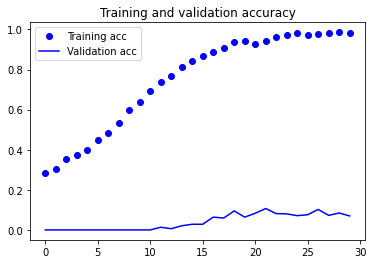

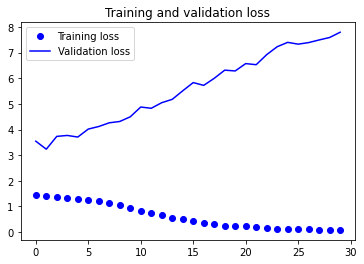

In [27]:
acc = cnn_history.history['accuracy']
val_acc = cnn_history.history['val_accuracy']
loss = cnn_history.history['loss']
val_loss = cnn_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

En este modelo se obtuvieron medidas similares de accuracy para el conjunto de prueba al modelo simple, sin embargo el comportamiento de la función de costo nos indica que este modelo se sobreajusta muy rápidamente, lo que nos impide tener buen resultado en el conjunto de prueba que en este caso fue un puntaje de accuracy de 0.23, el peor de los puntajes para el conjunto de prueba hasta ahora.

**Modelo recurrente**

Para el modelo recurrente se propone un modelo con una capa de embedding inicial, utilizando los embeddings que se crearon a partir dela BOW que se creó en el primer punto. Se agregan dos capas LSTM, dos capas densas idénticas al primer modelo y capas de regularización entre cada una de ellas. La capa de salida utiliza una función de activación sigmoide y se utiliza el mismo optimizador que el resto de los modelos que mostró tener mejores resultados que algunos otros que se probaron como RMSprop.

In [30]:
rnn_model = models.Sequential()
rnn_model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
rnn_model.add(layers.LSTM(64,return_sequences=True))
rnn_model.add(layers.LSTM(32))
rnn_model.add(layers.Dense(32, activation='relu'))
rnn_model.add(layers.Dropout(0.2))
rnn_model.add(layers.Dense(5, activation='sigmoid'))
rnn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
rnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20000, 128)        1280000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 20000, 64)         49408     
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 165       
Total params: 1,343,045
Trainable params: 1,343,045
Non-trainable params: 0
____________________________________________

In [31]:
rnn_history = rnn_model.fit(BOW_train, y_train,
                    epochs=30,
                    batch_size=64,
                    validation_split=0.3)

Epoch 1/30
25/25 [==============================] - 105s 4s/step - loss: 1.4921 - accuracy: 0.2787 - val_loss: 3.1395 - val_accuracy: 0.0000e+00
Epoch 2/30
25/25 [==============================] - 103s 4s/step - loss: 1.3903 - accuracy: 0.2775 - val_loss: 3.9426 - val_accuracy: 0.0000e+00
Epoch 3/30
25/25 [==============================] - 103s 4s/step - loss: 1.3779 - accuracy: 0.2711 - val_loss: 4.3002 - val_accuracy: 0.0000e+00
Epoch 4/30
25/25 [==============================] - 103s 4s/step - loss: 1.3678 - accuracy: 0.3003 - val_loss: 4.5583 - val_accuracy: 0.0000e+00
Epoch 5/30
25/25 [==============================] - 103s 4s/step - loss: 1.3674 - accuracy: 0.2851 - val_loss: 4.8075 - val_accuracy: 0.0000e+00
Epoch 6/30
25/25 [==============================] - 103s 4s/step - loss: 1.3662 - accuracy: 0.2578 - val_loss: 4.8827 - val_accuracy: 0.0000e+00
Epoch 7/30
25/25 [==============================] - 103s 4s/step - loss: 1.3610 - accuracy: 0.2876 - val_loss: 5.0105 - val_accura

In [32]:
rnn_model.evaluate(BOW_test,y_test)

32/32 [==============================] - 47s 1s/step - loss: 2.8212 - accuracy: 0.2000


[2.8212249279022217, 0.20000000298023224]

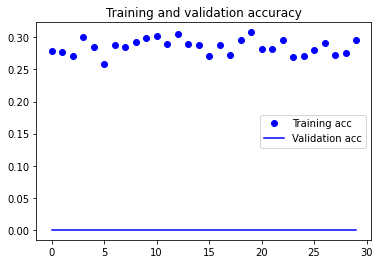

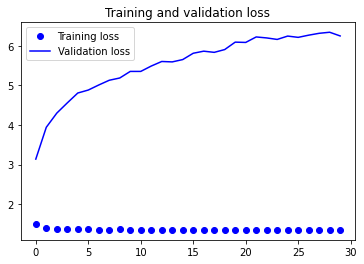

In [33]:
acc = rnn_history.history['accuracy']
val_acc = rnn_history.history['val_accuracy']
loss = rnn_history.history['loss']
val_loss = rnn_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

El modelo elegido tiene un puntaje de accuracy tanto en el conjunto de entrenamiento como en el de prueba muy bajo. En el caso de prueba se obtiene un puntaje casi igual al que se obtendría si adivináramos por azar las clases de los textos. Este es el peor modelo que se tiene hasta ahora

**Transfer Learning**

Para la parte de transfer learning se siguieron dos enfoques: 

1.   Entrenamos nuestro propio modelo de word2vec para obtener embeddings basados en nuestros textos de entrenamiento,
2.   Se utilizaron los vectores de embeddings previamente entrenados con corpus en español. 

Debido al soporte que da la librería **gensim** estos dos enfoques fueron posibles de realizar únicamente para la representación **word2vec**. En el caso de la representación **GloVe** sólo se cargaron los vectores preentrenados y estos fueron pasados a un formato **word2vec** para su utilización en el modelo. 

Estos embeddings se utilizaron como pesos en una primera capa de la red. Se encontró en referencias que el uso de este tipo de embeddings funciona mejor en modelos funcionales (no secuenciales) RNN combinados con una capa de *atención*, por lo que se propone un modelo con una capa de atención, dos capas bidireccionales LSTM y dos capas densas. Además se encontró que el tipo de red a utilizar requiere más épocas para su entrenamiento. 

**Preparamos los datos y modelos que se utilizarán**

In [34]:
from keras.preprocessing import sequence

In [35]:
train_text2seq=tokenizer.texts_to_sequences(tr_txt)
train_seq2txt=tokenizer.sequences_to_texts(train_text2seq)

test_text2seq=tokenizer.texts_to_sequences(te_txt)
test_seq2txt=tokenizer.sequences_to_texts(test_text2seq)

In [36]:
train_corpus=[]
for i in range(len(train_seq2txt)):
  tmp=train_seq2txt[i]
  words=tmp.split()
  train_corpus.append(words)

In [37]:
import gensim
from gensim.models import Word2Vec
#Entrenamos nuestro propio modelo de word2vec
w2v = Word2Vec(sentences=train_corpus, size=300, window=5, min_count=1, workers=4)

In [38]:
#Cargamos vectores pre-entrenados de w2v
w2v_path = "/content/drive/My Drive/Tarea 5/SBW-vectors-300-min5.txt.bz2"

w2vp = gensim.models.KeyedVectors.load_word2vec_format(w2v_path, binary=False)

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec

#Cargamos vectores pre-entrenados glove y los escribimos en un archivo binario tipo w2v
glove_file ='/content/drive/My Drive/Tarea 5/glove-sbwc.i25.vec.gz'
tmp_file = '/content/drive/My Drive/Tarea 5/gensim_glove_vectors.bin'

_ = glove2word2vec(glove_file, tmp_file)

In [40]:
#Cargamos el archivo glove en formato w2v
glove = gensim.models.KeyedVectors.load_word2vec_format(tmp_file,binary=True)

In [41]:
from keras import preprocessing 
#Padding de secuencias con una longitud máxima de 15
X_train = preprocessing.sequence.pad_sequences(train_text2seq, 
                    maxlen=15, padding="post", truncating="post")
X_test = preprocessing.sequence.pad_sequences(test_text2seq, 
                    maxlen=15, padding="post", truncating="post")

In [42]:
#Creamos la matriz de embeddings primero con
#los vectores del modelo w2v que entrenamos nosotros mismos.

embeddings = np.zeros((len(word_index)+1, 300))

for word,idx in word_index.items():
    try:
        embeddings[idx] =  w2v[word]
    except:
        pass

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [71]:
x_in=layers.Input(shape=(15,))
x1=layers.Embedding(input_dim=embeddings.shape[0],  
                     output_dim=embeddings.shape[1], 
                     weights=[embeddings],
                     input_length=15, trainable=False)(x_in)
x=layers.Permute((2,1))(x1)
x=layers.Dense(15, activation="softmax")(x)
x=layers.Permute((2,1), name="attention")(x)
x=layers.multiply([x1, x])
x=layers.Bidirectional(layers.LSTM(units=15, dropout=0.2, 
                         return_sequences=True))(x)
x=layers.Bidirectional(layers.LSTM(units=15, dropout=0.2))(x)
x=layers.Dense(64, activation='relu')(x)
y=layers.Dense(5, activation='sigmoid')(x)
tl_model=models.Model(x_in,y)
tl_model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

tl_model.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 15)]         0                                            
__________________________________________________________________________________________________
embedding_14 (Embedding)        (None, 15, 300)      70180200    input_14[0][0]                   
__________________________________________________________________________________________________
permute_12 (Permute)            (None, 300, 15)      0           embedding_14[0][0]               
__________________________________________________________________________________________________
dense_22 (Dense)                (None, 300, 15)      240         permute_12[0][0]                 
_______________________________________________________________________________________

In [72]:
tl_history = tl_model.fit(x=X_train, y=y_train, batch_size=42, 
                     epochs=100, shuffle=True, verbose=1,validation_split=0.3)

Epoch 1/100
38/38 [==============================] - 2s 63ms/step - loss: 1.5076 - accuracy: 0.2705 - val_loss: 3.5851 - val_accuracy: 0.0000e+00
Epoch 2/100
38/38 [==============================] - 1s 22ms/step - loss: 1.3664 - accuracy: 0.2857 - val_loss: 4.6947 - val_accuracy: 0.0000e+00
Epoch 3/100
38/38 [==============================] - 1s 24ms/step - loss: 1.3512 - accuracy: 0.2971 - val_loss: 5.5649 - val_accuracy: 0.0000e+00
Epoch 4/100
38/38 [==============================] - 1s 24ms/step - loss: 1.3483 - accuracy: 0.2965 - val_loss: 5.9829 - val_accuracy: 0.0000e+00
Epoch 5/100
38/38 [==============================] - 1s 25ms/step - loss: 1.3479 - accuracy: 0.2952 - val_loss: 6.1197 - val_accuracy: 0.0000e+00
Epoch 6/100
38/38 [==============================] - 1s 22ms/step - loss: 1.3336 - accuracy: 0.2857 - val_loss: 5.8197 - val_accuracy: 0.0000e+00
Epoch 7/100
38/38 [==============================] - 1s 22ms/step - loss: 1.3252 - accuracy: 0.3429 - val_loss: 6.3486 - val

In [73]:
tl_model.evaluate(X_test,y_test)

32/32 [==============================] - 0s 7ms/step - loss: 6.4247 - accuracy: 0.2530


[6.424673557281494, 0.2529999911785126]

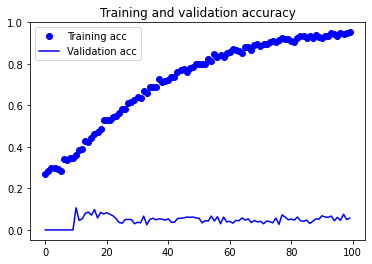

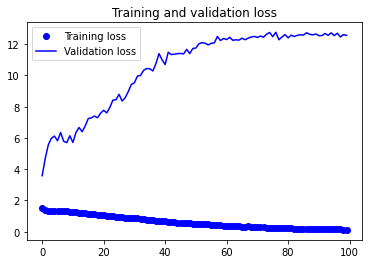

In [74]:
acc = tl_history.history['accuracy']
val_acc = tl_history.history['val_accuracy']
loss = tl_history.history['loss']
val_loss = tl_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Con los vectores pre-entrenados de w2v**

In [75]:
embeddings = np.zeros((len(word_index)+1, 300))

for word,idx in word_index.items():
    try:
        embeddings[idx] =  w2vp[word]
    except:
        pass

In [76]:
#Mismo modelo. Lo re-definimos para utilizar los nuevos embeddings
x_in=layers.Input(shape=(15,))
x1=layers.Embedding(input_dim=embeddings.shape[0],  
                     output_dim=embeddings.shape[1], 
                     weights=[embeddings],
                     input_length=15, trainable=False)(x_in)
x=layers.Permute((2,1))(x1)
x=layers.Dense(15, activation="softmax")(x)
x=layers.Permute((2,1), name="attention")(x)
x=layers.multiply([x1, x])
x=layers.Bidirectional(layers.LSTM(units=15, dropout=0.2, 
                         return_sequences=True))(x)
x=layers.Bidirectional(layers.LSTM(units=15, dropout=0.2))(x)
x=layers.Dense(64, activation='relu')(x)
y=layers.Dense(5, activation='sigmoid')(x)
tl2_model=models.Model(x_in,y)
tl2_model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
tl2_history = tl2_model.fit(x=X_train, y=y_train, batch_size=42, 
                     epochs=100, shuffle=True, verbose=1,validation_split=0.3)

Epoch 1/100
38/38 [==============================] - 2s 62ms/step - loss: 1.5144 - accuracy: 0.2883 - val_loss: 3.9826 - val_accuracy: 0.0000e+00
Epoch 2/100
38/38 [==============================] - 1s 23ms/step - loss: 1.3560 - accuracy: 0.2787 - val_loss: 5.8332 - val_accuracy: 0.0000e+00
Epoch 3/100
38/38 [==============================] - 1s 24ms/step - loss: 1.3537 - accuracy: 0.2857 - val_loss: 6.0405 - val_accuracy: 0.0000e+00
Epoch 4/100
38/38 [==============================] - 1s 25ms/step - loss: 1.3536 - accuracy: 0.2781 - val_loss: 6.1722 - val_accuracy: 0.0000e+00
Epoch 5/100
38/38 [==============================] - 1s 24ms/step - loss: 1.3526 - accuracy: 0.2902 - val_loss: 6.3380 - val_accuracy: 0.0000e+00
Epoch 6/100
38/38 [==============================] - 1s 23ms/step - loss: 1.3530 - accuracy: 0.2768 - val_loss: 6.4835 - val_accuracy: 0.0000e+00
Epoch 7/100
38/38 [==============================] - 1s 24ms/step - loss: 1.3532 - accuracy: 0.2787 - val_loss: 6.6105 - val

In [78]:
tl2_model.evaluate(X_test,y_test)

32/32 [==============================] - 0s 8ms/step - loss: 4.1889 - accuracy: 0.2610


[4.188928604125977, 0.26100000739097595]

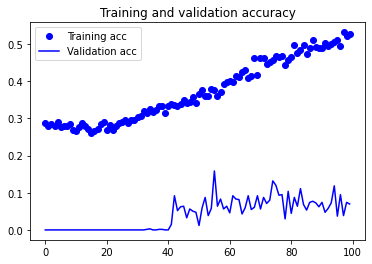

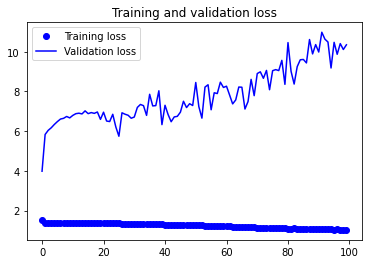

In [77]:
acc = tl2_history.history['accuracy']
val_acc = tl2_history.history['val_accuracy']
loss = tl2_history.history['loss']
val_loss = tl2_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Vectores pre-entrenados GloVe**



In [79]:
embeddings = np.zeros((len(word_index)+1, 300))

for word,idx in word_index.items():
    try:
        embeddings[idx] =  glove[word]
    except:
        pass

In [80]:
x_in=layers.Input(shape=(15,))
x1=layers.Embedding(input_dim=embeddings.shape[0],  
                     output_dim=embeddings.shape[1], 
                     weights=[embeddings],
                     input_length=15, trainable=False)(x_in)
x=layers.Permute((2,1))(x1)
x=layers.Dense(15, activation="softmax")(x)
x=layers.Permute((2,1), name="attention")(x)
x=layers.multiply([x1, x])
x=layers.Bidirectional(layers.LSTM(units=15, dropout=0.2, 
                         return_sequences=True))(x)
x=layers.Bidirectional(layers.LSTM(units=15, dropout=0.2))(x)
x=layers.Dense(64, activation='relu')(x)
y=layers.Dense(5, activation='sigmoid')(x)
tl3_model=models.Model(x_in,y)
tl3_model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
tl3_history = tl3_model.fit(x=X_train, y=y_train, batch_size=42, 
                     epochs=100, shuffle=True, verbose=1,validation_split=0.3)

Epoch 1/100
38/38 [==============================] - 2s 61ms/step - loss: 1.5518 - accuracy: 0.2857 - val_loss: 2.9929 - val_accuracy: 0.0000e+00
Epoch 2/100
38/38 [==============================] - 1s 26ms/step - loss: 1.3589 - accuracy: 0.2800 - val_loss: 5.6633 - val_accuracy: 0.0000e+00
Epoch 3/100
38/38 [==============================] - 1s 25ms/step - loss: 1.3544 - accuracy: 0.2876 - val_loss: 6.0409 - val_accuracy: 0.0000e+00
Epoch 4/100
38/38 [==============================] - 1s 22ms/step - loss: 1.3541 - accuracy: 0.2717 - val_loss: 6.1536 - val_accuracy: 0.0000e+00
Epoch 5/100
38/38 [==============================] - 1s 21ms/step - loss: 1.3528 - accuracy: 0.2825 - val_loss: 6.2770 - val_accuracy: 0.0000e+00
Epoch 6/100
38/38 [==============================] - 1s 24ms/step - loss: 1.3541 - accuracy: 0.2819 - val_loss: 6.5025 - val_accuracy: 0.0000e+00
Epoch 7/100
38/38 [==============================] - 1s 25ms/step - loss: 1.3528 - accuracy: 0.2838 - val_loss: 6.5742 - val

In [81]:
tl3_model.evaluate(X_test,y_test)

32/32 [==============================] - 0s 8ms/step - loss: 3.4501 - accuracy: 0.2000


[3.4501359462738037, 0.20000000298023224]

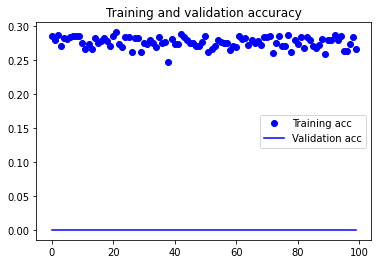

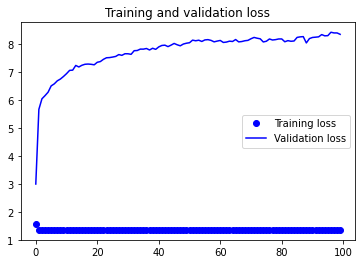

In [82]:
acc = tl3_history.history['accuracy']
val_acc = tl3_history.history['val_accuracy']
loss = tl3_history.history['loss']
val_loss = tl3_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Ninguno de los modelos que se presentaron aquí tuvieron mejores resultados que la red simple con dos capas densas y una capa de regularización dropout. Se considera que una de las razones es que se utilizaron pocos datos (textos) para realizar el entrenamiento de los modelos. En el caso de los vectores pre-entrenados considero que repitiendo este mismo ejercicio pero con textos, vectores y modelos entrenados en el idioma inglés los resultados hubieran sido ampliamente distintos. Además de que los vectores pre-entrenados tanto de GloVe, Word2Vec y FastText requieren gran espacio y capacidad computacional para ser procesados, no presentaron una ventaja significativa para la tarea de clasificación de textos **en este ejercicio en particular**.